<a href="https://colab.research.google.com/github/PreritSM/rimcrusher/blob/master/CNN_Horse_Human.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The following models are trained on 'Horse vs Human' dataset provided by Laurence Moroney (Lead AI advocate at Google). These models use various optimization techniques including different optimizers, variable learning rate, batch normalization and dropout. 


---


#(Future Target) 


#The model will be improvised to include object localization with confidence scores.






In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip
  
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

train_horse_dir = os.path.join('/tmp/horse-or-human/horses')


train_human_dir = os.path.join('/tmp/horse-or-human/humans')


validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')


validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

--2021-07-20 15:38:51--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   287MB/s    in 0.5s    

2021-07-20 15:38:51 (287 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]

--2021-07-20 15:38:51--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 2607:f8b0:400e:c00::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Len

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()  # To verify that GPU is enabled ..

'/device:GPU:0'

#This is the representation of the network used to train on data. The two models differ in optimizers and learning rate, this helps to study their effects in practice.

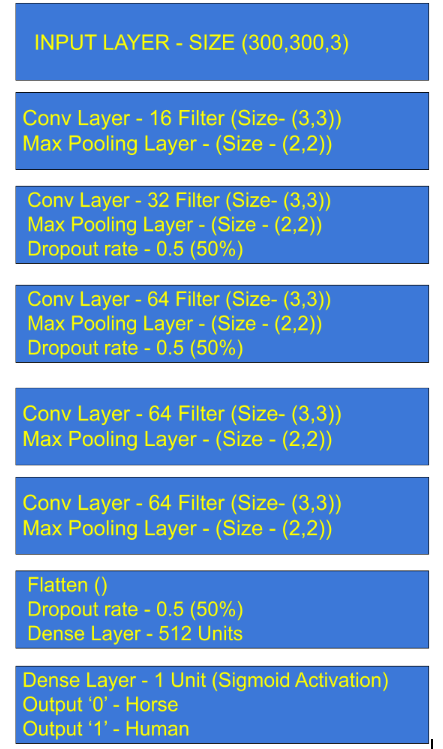

 #NOTE - All the Convolution Layers have ReLU as their activation function 

In [ ]:
model = tf.keras.models.Sequential([
    
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(512, activation='relu'),
    
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
from tensorflow.keras.optimizers import RMSprop
import time
import datetime,os
%load_ext tensorboard
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

NAME= "Horses-vs-Human-cnn-rmsprop-{}".format(int(time.time()))
print(NAME)

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

Horses-vs-Human-cnn-rmsprop-1626795535


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 # ImageDataGenrator helps in Image Augmentation as this increases our in-sample size .. 

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1/255)

# Flowing training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  
        target_size=(300, 300),  
        batch_size=128,
       
        class_mode='binary')

# Flowing training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/tmp/validation-horse-or-human/',  
        target_size=(300, 300),  
        batch_size=32,
       
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=50,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8,
      callbacks=[tensorboard_callback])

%tensorboard — logdir logs

Epoch 1/50
8/8 [==============================] - 45s 3s/step - loss: 0.7347 - accuracy: 0.5172 - val_loss: 0.6871 - val_accuracy: 0.5430
Epoch 2/50
8/8 [==============================] - 22s 3s/step - loss: 0.6754 - accuracy: 0.5717 - val_loss: 0.6840 - val_accuracy: 0.5273
Epoch 3/50
8/8 [==============================] - 25s 3s/step - loss: 0.6553 - accuracy: 0.6348 - val_loss: 0.6824 - val_accuracy: 0.5000
Epoch 4/50
8/8 [==============================] - 22s 3s/step - loss: 0.6158 - accuracy: 0.6618 - val_loss: 0.7150 - val_accuracy: 0.5000
Epoch 5/50
8/8 [==============================] - 23s 3s/step - loss: 0.6097 - accuracy: 0.6819 - val_loss: 0.6947 - val_accuracy: 0.5000
Epoch 6/50
8/8 [==============================] - 23s 3s/step - loss: 0.6462 - accuracy: 0.6507 - val_loss: 0.6777 - val_accuracy: 0.5000
Epoch 7/50
8/8 [==============================] - 22s 3s/step - loss: 0.5638 - accuracy: 0.7175 - val_loss: 0.6650 - val_accuracy: 0.5234
Epoch 8/50
8/8 [==================

ERROR: Failed to launch TensorBoard (exited with 2).
Contents of stderr:
2021-07-20 16:05:45.308340: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
usage: tensorboard [-h] [--helpfull] {serve,dev} ...
tensorboard: error: invalid choice: '—' (choose from 'serve', 'dev')

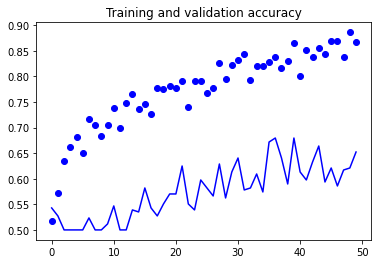

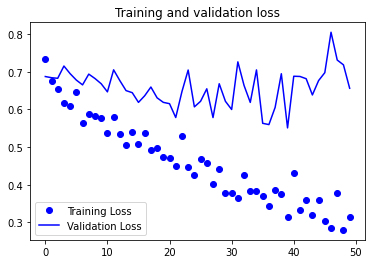

In [ ]:
from tensorboard import notebook
notebook.list()

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# The above model is clearly overfitting as training accuracy is too high as compared to validation accuracy

In [ ]:

# This is second model to with adam optimization and variable learning rate
model2 = tf.keras.models.Sequential([
    
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu',kernel_regularizer='l2'),
    
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [ ]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
         lambda epoch: 1e-8 * 10**(epoch / 25))

In [ ]:
%load_ext tensorboard
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)


model2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
history2 = model2.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=50,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8,callbacks=[lr_schedule,tensorboard_callback])

%tensorboard — logdir logs

Epoch 1/50
8/8 [==============================] - 23s 3s/step - loss: 9.5316 - accuracy: 0.5028 - val_loss: 9.4984 - val_accuracy: 0.4883
Epoch 2/50
8/8 [==============================] - 21s 3s/step - loss: 9.5376 - accuracy: 0.4816 - val_loss: 9.4984 - val_accuracy: 0.4844
Epoch 3/50
8/8 [==============================] - 22s 3s/step - loss: 9.5349 - accuracy: 0.4861 - val_loss: 9.4984 - val_accuracy: 0.4844
Epoch 4/50
8/8 [==============================] - 22s 3s/step - loss: 9.5429 - accuracy: 0.4783 - val_loss: 9.4983 - val_accuracy: 0.4844
Epoch 5/50
8/8 [==============================] - 21s 3s/step - loss: 9.5412 - accuracy: 0.4850 - val_loss: 9.4983 - val_accuracy: 0.4844
Epoch 6/50
8/8 [==============================] - 22s 3s/step - loss: 9.5495 - accuracy: 0.4850 - val_loss: 9.4982 - val_accuracy: 0.4844
Epoch 7/50
8/8 [==============================] - 21s 3s/step - loss: 9.5389 - accuracy: 0.4694 - val_loss: 9.4982 - val_accuracy: 0.4844
Epoch 8/50
8/8 [==================

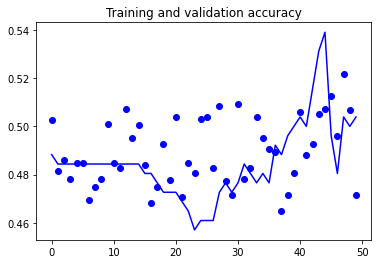

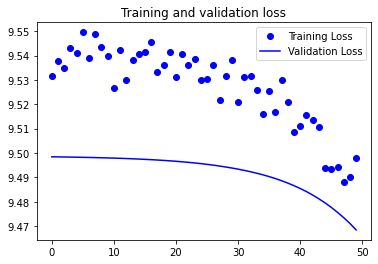

In [ ]:
from tensorboard import notebook
notebook.list()

import matplotlib.pyplot as plt
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# This shows the model is again overfitting along with few losses in feature due to l2 regularizations hence this performed worse then the previous one.
# I suspect that this learning rate tweaking worked against our expectation to see better results. 

---


